<a href="https://colab.research.google.com/github/willkakuta/Titanic_test/blob/main/Titanic_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



Importando os Data Sets

In [ ]:
train = pd.read_csv('/content/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Entendendo os dados

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Copiando a base de teste

In [ ]:
test_copy = test.copy()

Removendo colunas desnecessárias para o case

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

test_copy.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Completando colunas vazias

In [ ]:
train["Age"].fillna(train["Age"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode(), inplace=True)

test_copy["Age"].fillna(test_copy["Age"].median(), inplace=True)
test_copy["Embarked"].fillna(test_copy["Embarked"].mode(), inplace=True)

Transformando os dados categóricos

In [ ]:
le = LabelEncoder()

train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])

test_copy["Sex"] = le.fit_transform(test_copy["Sex"])
test_copy["Embarked"] = le.fit_transform(test_copy["Embarked"])

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


Entendendo melhor os dados

In [ ]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


Gráfico boxplot para ver a situação dos outliers

Text(0.5, 1.0, 'Boxplot para todas as colunas do conjunto de treinamento')

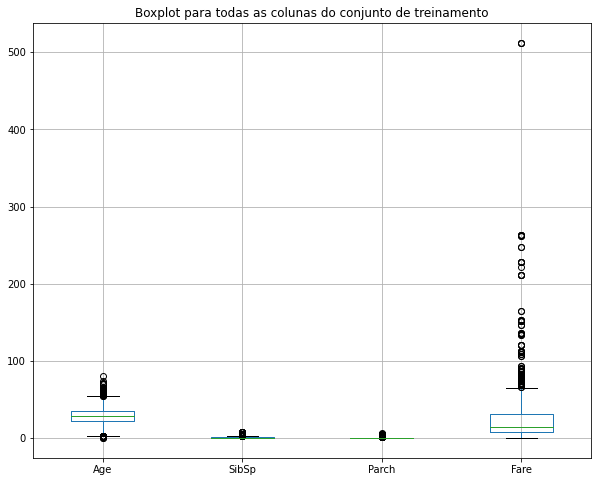

In [ ]:
cols = ["Age", "SibSp", "Parch", "Fare"]

plt.figure(figsize=(10,8))
train[cols].boxplot()

plt.title("Boxplot para todas as colunas do conjunto de treinamento")

In [ ]:
#train = train[train["Fare"] < 200]
#train.info()


#test_copy = test_copy[test_copy["Fare"] < 200]

<AxesSubplot:>

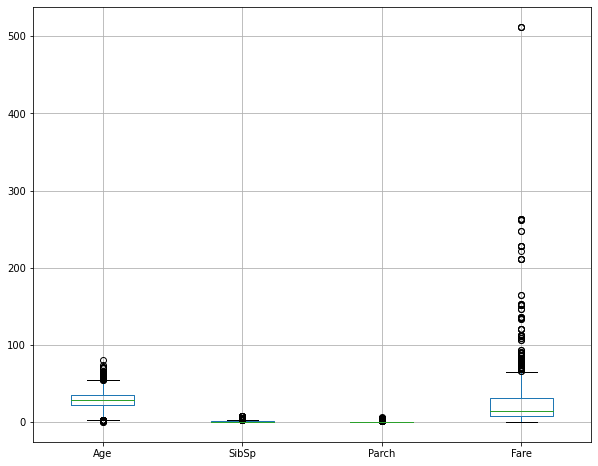

In [ ]:
plt.figure(figsize=(10,8))
train[cols].boxplot()

Histograma para visualizar melhor a normalização dos dados

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

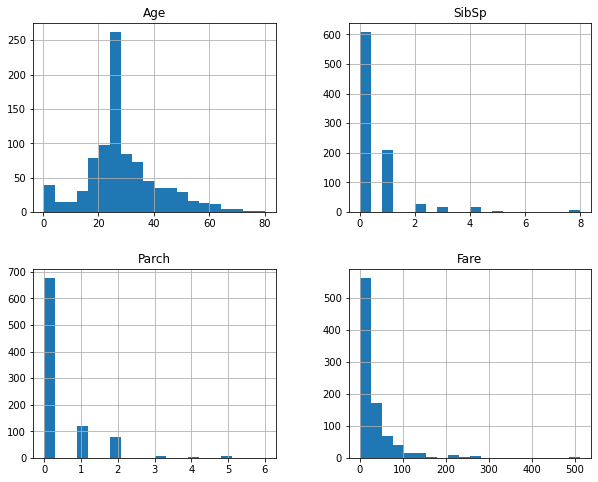

In [ ]:
train[cols].hist(bins=20, figsize=(10, 8))

Normalizando os dados

In [ ]:
# Seleciona as colunas de interesse
cols = ["Age", "Fare"]

# Aplica a normalização por log nas colunas de interesse
train[cols] = np.log1p(train[cols])

test_copy[cols] = np.log1p(test_copy[cols])

Resultado da normalização

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

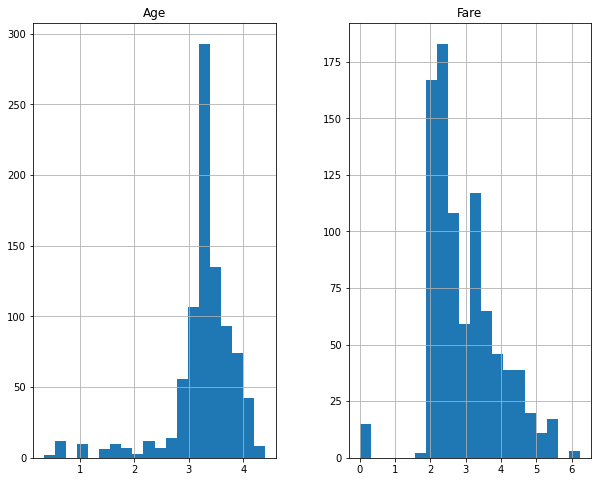

In [ ]:
train[cols].hist(bins=20, figsize=(10, 8))

Boxplot somente para ver como ficou

<AxesSubplot:>

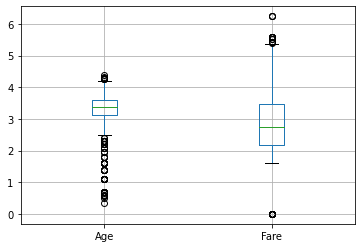

In [ ]:
train[cols].boxplot()

In [ ]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


Separando as features para treinar o modelo

In [ ]:
X = train.drop("Survived", axis=1)
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Resultado da Acurácia do modelo

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Acurácia: {:.2f}%".format(accuracy * 100))

Acurácia: 75.42%


Entendendo as features que mais foram relevantes para o modelo

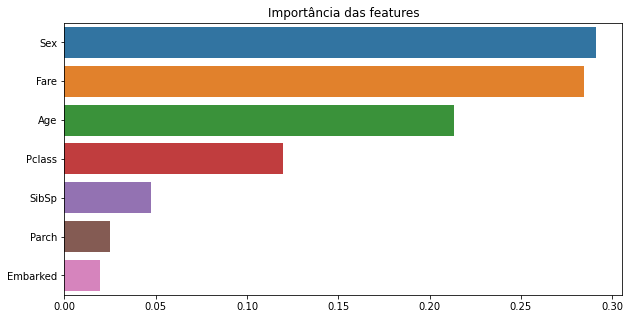

In [ ]:
#plotar a importância das features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure(figsize=(10,5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Importância das features')
plt.show()

Fazendo os hiperparametros

As linhas comentadas, foram alguns testes que fiz ao longo do processo

In [ ]:
#param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              #'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              #'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]}

Selecionando os hiperparametros

In [ ]:
param_grid = {'max_depth': [6],
              'min_samples_split': [7],
              'min_samples_leaf': [1]}

In [ ]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              #'penalty': ['l1', 'l2']}

In [ ]:
#param_grid = {'C': [10],
              #'penalty': ['l2']}

Utilizando gridsearch

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
print("Melhores parâmetros: ", grid_search.best_params_)

Melhores parâmetros:  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}


In [ ]:
y_pred = grid_search.predict(X_test)

Resultado da Acurácia depois do Tuning

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))

Acurácia: 81.01%


Fazendo os testes para Submission

In [ ]:
test_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.569533,0,0,2.178064,1
1,3,0,3.871201,1,0,2.079442,2
2,2,1,4.143135,0,0,2.369075,1
3,3,1,3.332205,0,0,2.268252,2
4,3,0,3.135494,1,1,2.586824,2
...,...,...,...,...,...,...,...
413,3,1,3.332205,0,0,2.202765,2
414,1,0,3.688879,0,0,4.699571,0
415,3,1,3.676301,0,0,2.110213,2
416,3,1,3.332205,0,0,2.202765,2


In [ ]:
test_copy.fillna(test_copy.mean(), inplace=True)

In [ ]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


Treinando predições na cópia do teste

In [ ]:
submission_preds = clf.predict(test_copy)

In [ ]:
submission_preds = grid_search.predict(test_copy)

Formatando para submissão

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Transformando o dados do arquivo de teste para conseguir usar o modelo

In [ ]:
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)
test["Embarked"].fillna(test["Embarked"].mode(), inplace=True)
test["Sex"] = le.fit_transform(test["Sex"])
test["Embarked"] = le.fit_transform(test["Embarked"])

In [ ]:
#test = test[test["Fare"] < 200]
#test.info()

In [ ]:
test_ids = test['PassengerId']

In [ ]:
test_ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
df = pd.DataFrame({'PassengerId': test_ids.values,
                   'Survived': submission_preds})

In [ ]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Arquivo de submissão para o kaggle

In [ ]:
df.to_csv('submission_titanic.csv', index=False)